In [28]:
library(ltm)
library(catR)
library(mirt)
library(mirtCAT)
library(CDM)

**********************************
** CDM 4.5-0 (2015-08-28)       **
** Cognitive Diagnostic Models  **
**********************************



In [6]:
head(LSAT)
dim(LSAT)

,Item 1,Item 2,Item 3,Item 4,Item 5
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,1
6,0,0,0,0,1


[1] 1000    5

$$2 + 4 = 6$$

In [13]:
fit <- rasch(LSAT)
fit


Call:
rasch(data = LSAT)

Coefficients:
Dffclt.Item 1  Dffclt.Item 2  Dffclt.Item 3  Dffclt.Item 4  Dffclt.Item 5  
       -3.615         -1.322         -0.318         -1.730         -2.780  
       Dscrmn  
        0.755  

Log.Lik: -2466.938


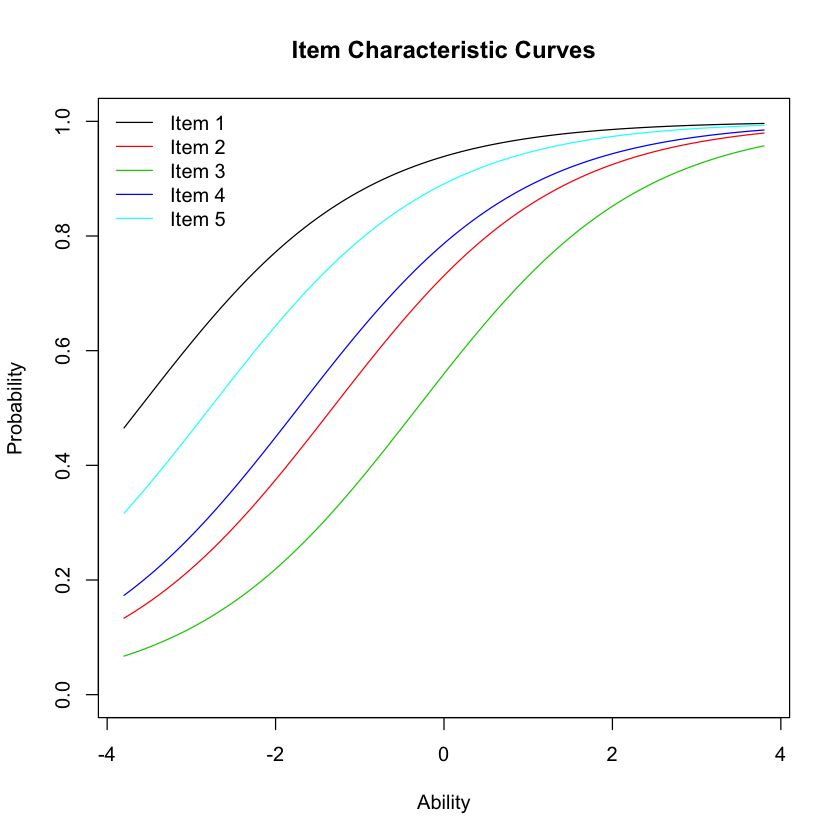

In [19]:
plot(fit, legend = TRUE)

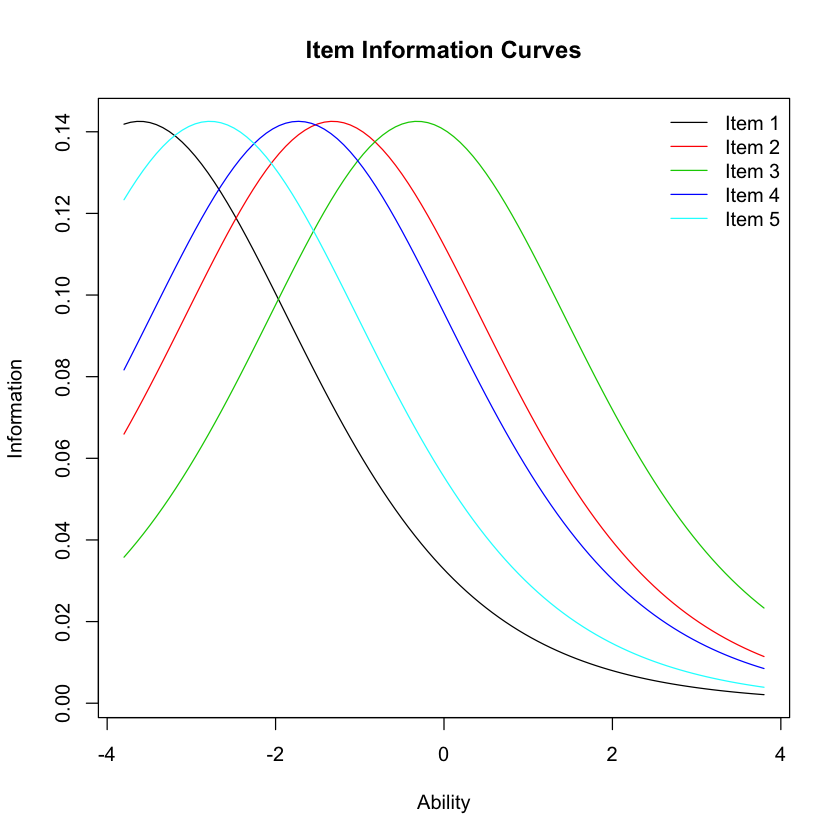

In [22]:
plot(fit, type="IIC", legend=TRUE, cx="topright")

In [24]:
factor.scores(fit)


Call:
rasch(data = LSAT)

Scoring Method: Empirical Bayes

Factor-Scores for observed response patterns:
   Item 1 Item 2 Item 3 Item 4 Item 5 Obs     Exp     z1 se.z1
1       0      0      0      0      0   3   2.364 -1.910 0.790
2       0      0      0      0      1   6   5.468 -1.439 0.793
3       0      0      0      1      0   2   2.474 -1.439 0.793
4       0      0      0      1      1  11   8.249 -0.959 0.801
5       0      0      1      0      0   1   0.852 -1.439 0.793
6       0      0      1      0      1   1   2.839 -0.959 0.801
7       0      0      1      1      0   3   1.285 -0.959 0.801
8       0      0      1      1      1   4   6.222 -0.466 0.816
9       0      1      0      0      0   1   1.819 -1.439 0.793
10      0      1      0      0      1   8   6.063 -0.959 0.801
11      0      1      0      1      1  16  13.288 -0.466 0.816
12      0      1      1      0      1   3   4.574 -0.466 0.816
13      0      1      1      1      0   2   2.070 -0.466 0.816
14      0   

In [29]:
CATdesign <- mirtCAT(NULL, fit, criteria='Drule', start_item='Drule', local_pattern=fraction.subtraction.data, design_elements=TRUE)

ERROR: Error in is.data.frame(x): tentative d'obtenir le slot "Data" d'un objet (classe "rasch") qui n'est pas un objet S4


In [30]:
head(fraction.subtraction.data)

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,0,1,1,1
2,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0
4,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1
5,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [15]:
abline(v = -4:4, h = seq(0, 1, 0.2), col = "lightgray", lty = "dotted")

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [34]:
a <- c(1.0, 1.2, 0.9, 0.8, 1.1, 1.2, 0.8, 0.7, 0.5, 1.0)
d <- c(-1.0, 1.5, 0.0, 0.5, -0.5, -1.0, 0.0, 0.1, 1.1, -0.2)
g <- rep(0.2, 10)
pars <- data.frame(a1 = a, d = d, g = g)
lc <- matrix(2)
mirt_object <- generate.mirt_object(pars, itemtype = '3PL', latent_covariance = lc)
coef(mirt_object, simplify = TRUE)

,a1,d,g,u
Item.1,1.0,-1.0,0.2,1.0
Item.2,1.2,1.5,0.2,1.0
Item.3,0.9,0.0,0.2,1.0
Item.4,0.8,0.5,0.2,1.0
Item.5,1.1,-0.5,0.2,1.0
Item.6,1.2,-1.0,0.2,1.0
Item.7,0.8,0.0,0.2,1.0
Item.8,0.7,0.1,0.2,1.0
Item.9,0.5,1.1,0.2,1.0
Item.10,1.0,-0.2,0.2,1.0


In [42]:
set.seed(1)
pattern <- generate_pattern(mirt_object, Theta = 1)
pattern

1,1,1,0,1,0,0,1,1,1


In [44]:
result <- mirtCAT(mo = mirt_object, local_pattern = pattern, start_item = 'MI', criteria = 'MI')

In [45]:
result

 n.items.answered   Theta_1 SE.Theta_1
               10 0.4286369   0.756829

In [46]:
summary(result)

$final_estimates
            Theta_1
Estimates 0.4286369
SEs       0.7568290

$raw_responses
 [1] 2 1 2 2 2 1 2 1 2 2

$scored_responses
 [1] 1 0 1 1 1 0 1 0 1 1

$items_answered
 [1]  5  6 10  3  1  7  2  4  8  9

$thetas_history
        Theta_1
 [1,] 0.0000000
 [2,] 0.6703153
 [3,] 0.1037139
 [4,] 0.4327211
 [5,] 0.6397439
 [6,] 0.9092936
 [7,] 0.5482711
 [8,] 0.6106313
 [9,] 0.2566567
[10,] 0.3815832
[11,] 0.4286369

$thetas_SE_history
        Theta_1
 [1,] 1.4142136
 [2,] 1.2347690
 [3,] 1.0672364
 [4,] 0.9533456
 [5,] 0.8912733
 [6,] 0.8512094
 [7,] 0.8306573
 [8,] 0.7991645
 [9,] 0.7939764
[10,] 0.7668602
[11,] 0.7568290

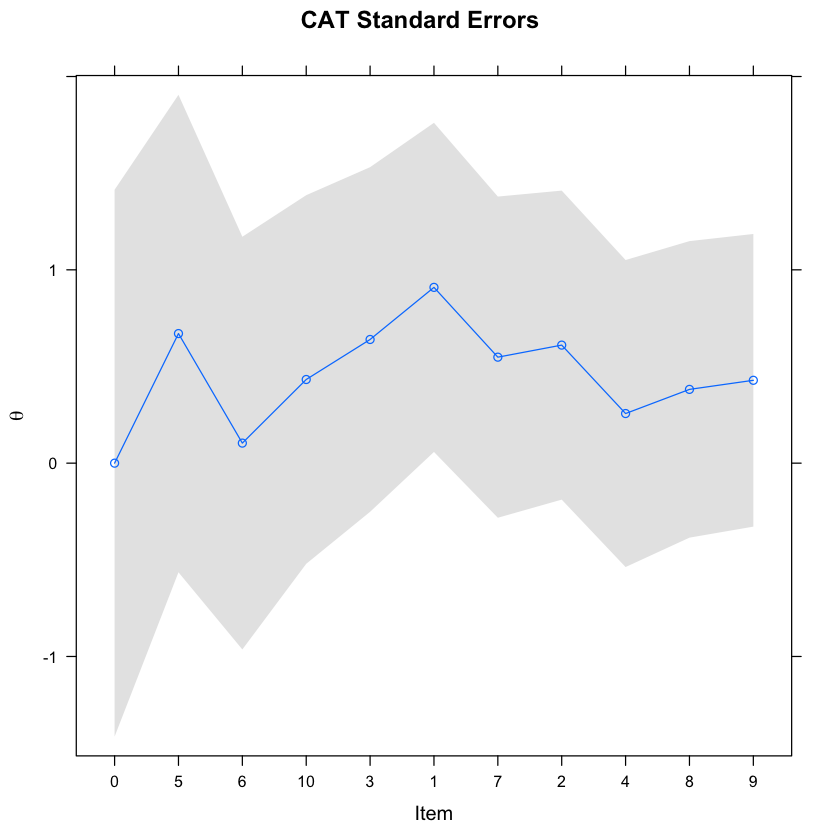

In [47]:
plot(result)